# Process Renovar CO Data according to reference station

## Constants and imports

In [17]:
input_data_directory = 'input/'
sensor_data_path = input_data_directory + 'alpha_co_concdataframe_no_changepoint_1hr.csv'
reference_data_path = input_data_directory + 'ref_air_quality_data_Vila_Moema.csv'
reference_column_name = 'Monóxido de Carbono'

## Load Alphasense CO sensor data

In [18]:
import pandas as pd

sensor_data = pd.read_csv(sensor_data_path).sort_values(by='DateTime', ascending=True)
sensor_data.index = sensor_data['DateTime']
sensor_data = sensor_data.drop(columns='DateTime')
sensor_data

,measuring,value
DateTime,,
2022-11-27 14:30:00,113.09000,0.129557
2022-11-27 17:30:00,96.12750,0.110125
2022-11-27 18:30:00,91.37250,0.104677
2022-11-27 19:30:00,88.21000,0.101054
2022-11-27 20:30:00,87.85750,0.100650
...,...,...
2023-02-04 03:30:00,30.43125,0.034862
2023-02-04 04:30:00,28.93625,0.033150
2023-02-04 05:30:00,33.25375,0.038096


## Load reference sensor data

In [19]:
import pandas as pd

reference_data = pd.read_csv(reference_data_path).sort_values(by='DateTime', ascending=True)
reference_data.index = reference_data['DateTime']
reference_data = reference_data.drop(columns='DateTime')[reference_column_name]
reference_data.head()

DateTime
2022-01-01 02:30:00    0.1467
2022-01-01 03:30:00    0.1544
2022-01-01 04:30:00    0.1167
2022-01-01 05:30:00    0.1079
2022-01-01 06:30:00    0.1154
Name: Monóxido de Carbono, dtype: float64

### Select period of interest according to CO sensor data

In [20]:
reference_data = reference_data[reference_data.index >= sensor_data.index[0]]
reference_data = reference_data[reference_data.index <= sensor_data.index[-1]]
reference_data

DateTime
2022-11-27 14:30:00    0.0013
2022-11-27 15:30:00    0.0050
2022-11-27 16:30:00    0.0121
2022-11-27 17:30:00    0.0011
2022-11-27 18:30:00    0.0095
                        ...  
2023-02-04 03:30:00    0.1174
2023-02-04 04:30:00    0.1153
2023-02-04 05:30:00    0.1395
2023-02-04 06:30:00    0.1864
2023-02-04 07:30:00    0.1965
Name: Monóxido de Carbono, Length: 1650, dtype: float64

## Append reference column to CO sensor Data

In [21]:
sensor_data['reference'] = reference_data
sensor_data

,measuring,value,reference
DateTime,,,
2022-11-27 14:30:00,113.09000,0.129557,0.0013
2022-11-27 17:30:00,96.12750,0.110125,0.0011
2022-11-27 18:30:00,91.37250,0.104677,0.0095
2022-11-27 19:30:00,88.21000,0.101054,0.0178
2022-11-27 20:30:00,87.85750,0.100650,0.0133
...,...,...,...
2023-02-04 03:30:00,30.43125,0.034862,0.1174
2023-02-04 04:30:00,28.93625,0.033150,0.1153
2023-02-04 05:30:00,33.25375,0.038096,0.1395


### Plot reference and sensor data

<Axes: xlabel='DateTime'>

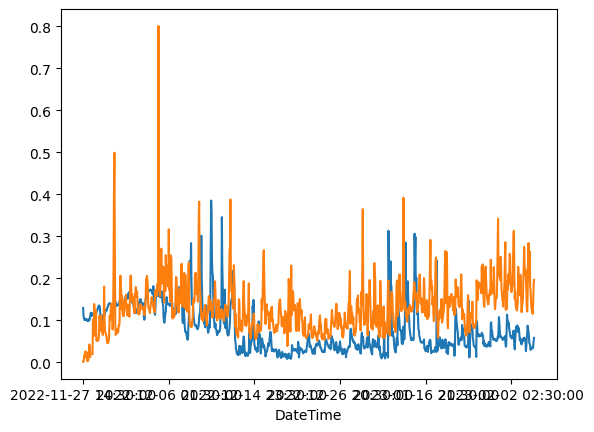

In [22]:
sensor_data['value'].plot()
sensor_data['reference'].plot()

## Separate reference data and valid sensor data

In [23]:
data = sensor_data[sensor_data.index <= reference_data.index[-1]][['value', 'reference']]
data

,value,reference
DateTime,,
2022-11-27 14:30:00,0.129557,0.0013
2022-11-27 17:30:00,0.110125,0.0011
2022-11-27 18:30:00,0.104677,0.0095
2022-11-27 19:30:00,0.101054,0.0178
2022-11-27 20:30:00,0.100650,0.0133
...,...,...
2023-02-04 03:30:00,0.034862,0.1174
2023-02-04 04:30:00,0.033150,0.1153
2023-02-04 05:30:00,0.038096,0.1395


## Plot sensor vs. reference

Spearmans correlation coefficient: 0.298
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.298
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.200, p<0.05")

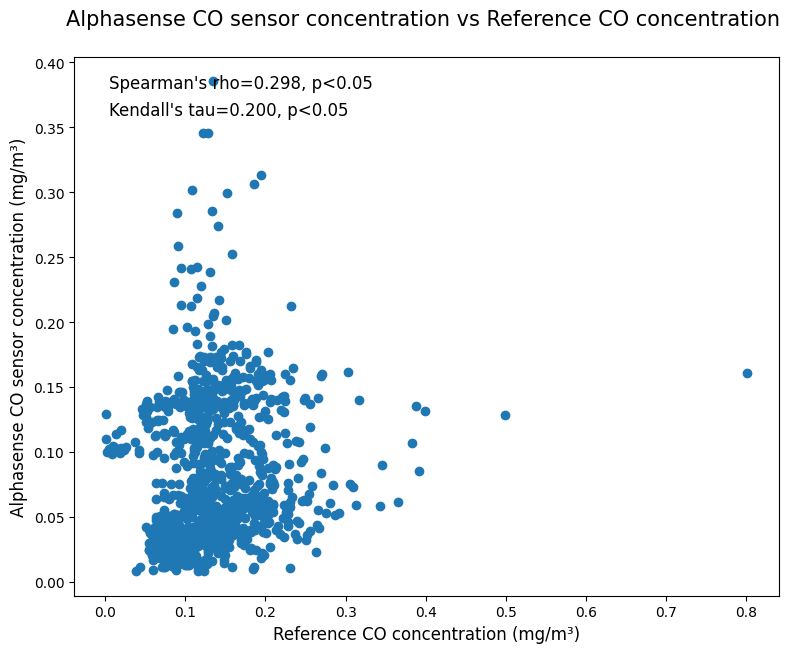

In [24]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(data['reference'], data['value'])
plt.title('Alphasense CO sensor concentration vs Reference CO concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference CO concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense CO sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(data['reference'], data['value'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( data['reference'], data['value'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)